Training ANN is often performed using mini-batch SGD. PyTorch offers ready to use functions to split your data into mini-batches for training. 

Here is a silly example

Text(0, 0.5, 'y')

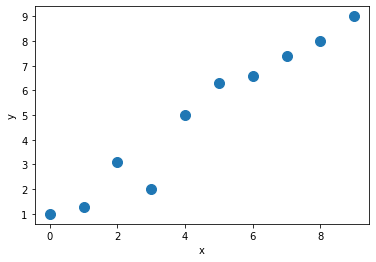

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

X_train = np.arange(10,dtype = float).reshape((10))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,7.4, 8.0,9.0], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

In [2]:
X_train = np.arange(10,dtype = 'float32').reshape((10))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,7.4, 8.0,9.0], dtype='float32')


#normalize the data 
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)

#conver numpy arrays to PyTorch tensors 
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)

#create a TensorDataset 
train_dataset = torch.utils.data.TensorDataset(X_train_norm, y_train)

batch_size =  1
#pass the DataSet to a DataLoader with the desired number of elements per batch 
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle= True)

In [3]:


loss_fn = torch.nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = torch.nn.Linear(input_size, output_size)
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


num_epochs = 300
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dataloader:
        
        #1. Generate predictions
        pred = model(x_batch)
        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)
        # 3. Compute gradients
        loss.backward()
        # 4. Update parameters using gradients
        optimizer.step()
        # 5. Reset the gradients to zero
        optimizer.zero_grad()
        
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}, bias {model.bias.detach().item():.4f}, coeff {model.weight.detach().item():.4f}')
        #print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 35.0056, bias 0.8699, coeff -0.3282
Epoch 10 Loss 50.1921, bias 1.6145, coeff 0.2233
Epoch 20 Loss 33.1663, bias 2.2239, coeff 0.6746
Epoch 30 Loss 0.0077, bias 2.7224, coeff 1.0439
Epoch 40 Loss 0.1838, bias 3.1306, coeff 1.3461
Epoch 50 Loss 6.5709, bias 3.4645, coeff 1.5933
Epoch 60 Loss 4.4373, bias 3.7380, coeff 1.7956
Epoch 70 Loss 0.0746, bias 3.9617, coeff 1.9613
Epoch 80 Loss 1.4953, bias 4.1447, coeff 2.0967
Epoch 90 Loss 1.5766, bias 4.2945, coeff 2.2076
Epoch 100 Loss 0.9704, bias 4.4171, coeff 2.2983
Epoch 110 Loss 0.7150, bias 4.5176, coeff 2.3725
Epoch 120 Loss 0.1913, bias 4.5997, coeff 2.4333
Epoch 130 Loss 0.0955, bias 4.6670, coeff 2.4829
Epoch 140 Loss 0.5166, bias 4.7220, coeff 2.5236
Epoch 150 Loss 0.1672, bias 4.7672, coeff 2.5568
Epoch 160 Loss 2.1261, bias 4.8039, coeff 2.5841
Epoch 170 Loss 0.1647, bias 4.8341, coeff 2.6063
Epoch 180 Loss 0.0649, bias 4.8589, coeff 2.6246
Epoch 190 Loss 0.0667, bias 4.8790, coeff 2.6396
Epoch 200 Loss 0.2644, bias

Text(0, 0.5, 'y')

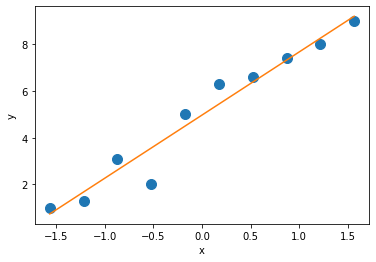

In [59]:
X_train = np.arange(10,dtype = float).reshape((10))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,7.4, 8.0,9.0], dtype='float32')
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_train_norm, X_train_norm*model.weight.detach().item() + model.bias.detach().item())
plt.xlabel('x')
plt.ylabel('y')

## Example 2

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)


X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train).long()

train_ds = torch.utils.data.TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 10
train_dl = torch.utils.data.DataLoader(train_ds, batch_size, shuffle=True)


X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test).long()

ModuleNotFoundError: No module named 'sklearn'

In [110]:
import torch.nn as nn 

class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
#         self.nonlin = nn.Sigmoid()
        self.nonlin = nn.ReLU()
 
    def forward(self, x):
        x = self.layer1(x)
        x = self.nonlin(x)
        x = self.layer2(x)
        return x

In [111]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
 
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 50
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

loss_test_hist = [0] * num_epochs
accuracy_test_hist = [0] * num_epochs

for epoch in range(num_epochs):
    model.train() #set the model for training
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)
    
    
    #compute the testing accuracy 
    with torch.no_grad():
        model.eval() #set the model for evaluation 
        pred_test = model(X_test_norm)

        correct = (torch.argmax(pred_test, dim=1) == y_test).float()
        accuracy_test_hist[epoch] = correct.mean()

        loss_test = loss_fn(pred_test, y_test)
        loss_test_hist[epoch] = loss_test.item()

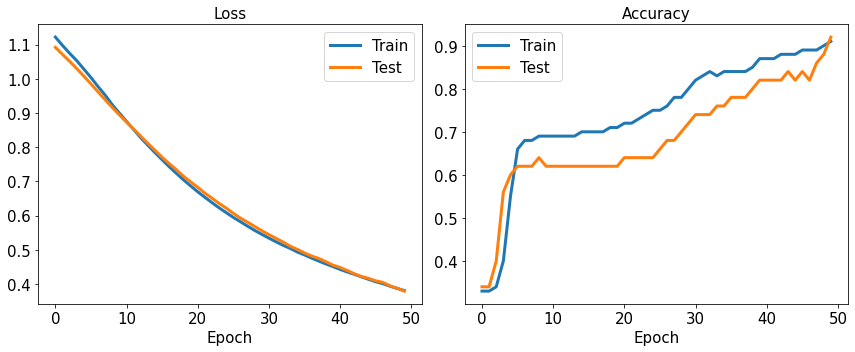

In [112]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3, label='Train')
ax.plot(loss_test_hist, lw=3, label='Test')
ax.set_title('Loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3, label='Train')
ax.plot(accuracy_test_hist, lw=3, label='Test')
ax.set_title('Accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15)
plt.tight_layout()

plt.show()

### A more complex example

MNIST dataset is a dataset composed of hundreds of images of handwritten digits. The images have been digitalized and converted to black and white. 


In [5]:
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

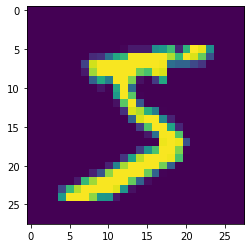

In [6]:
img, label  = mnist_trainset[0]
plt.imshow(img)

In [133]:
print(label)

5


In [142]:
print(img.size)

(28, 28)


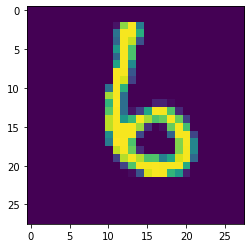

In [135]:
img, label  = mnist_trainset[1520]
plt.imshow(img)

In [136]:
print(label)

6


In [143]:
print(img.size)

(28, 28)


We need to create a DataSet that can load this data. The standard ```TensorDataSet``` cannot be used because the data comes in pairs (and image and a label), so we need to create a custom dataset

To do that, we are going to create a class that inherits from Dataset


In [7]:
#the class must have three methods:

# __init__ -> defines the components
# __getitem__ -> defines the logic to get the data
#__len__ -> simply returns the length of the dataset

class DatasetTransformer(torch.utils.data.Dataset):

    def __init__(self, data, transform):
        self.data= data
        self.transform = transform

    def __getitem__(self, index):
        #get the image and the label
        img, label= self.data[index]
        return self.transform(img), label

    def __len__(self):
        return len(self.data)


In [8]:
import torchvision.transforms as transforms

#we are going to transform the image into a pytorch tensor
train_dataset_full = DatasetTransformer(mnist_trainset, transforms.ToTensor())
test_dataset  = DatasetTransformer(mnist_testset, transforms.ToTensor())

In [9]:
#take a small sample of data
import random
idx = list(range(len(train_dataset)))
random.shuffle(idx)
train_dataset = torch.utils.data.Subset(train_dataset_full, idx[0:1000])

In [17]:
#mow you can create the DataLoaders with a specific batchsize

batch_size  = 128   # Using minibatches of 128 samples

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [18]:
data_from_loader = next(iter(train_loader))

In [19]:
data_from_loader[0].size()

torch.Size([10, 1, 28, 28])

In [16]:
print(data_from_loader[0][0].size(), data_from_loader[1][0].item())

print(data_from_loader[0][1].size(), data_from_loader[1][1].item())

print(data_from_loader[0][127].size(), data_from_loader[1][127].item())

torch.Size([1, 28, 28]) 1
torch.Size([1, 28, 28]) 9


IndexError: index 127 is out of bounds for dimension 0 with size 10

In [243]:
print(data_from_loader[0][128].size(), data_from_loader[1][128].item())

IndexError: index 128 is out of bounds for dimension 0 with size 128

In [244]:
class LinearNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LinearNet, self).__init__()
        self.input_size = input_size
        self.classifier = nn.Linear(self.input_size, num_classes)

    def forward(self, x):
        #make the image into a long vector
        x = x.view(x.size()[0], -1)
        y = self.classifier(x)
        return y

model = LinearNet(1*28*28, 10)

In [245]:
#check if the model works
out = model(data_from_loader[0])
print(out.size())

torch.Size([128, 10])


In [246]:
learning_rate = 0.01

loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 30
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

loss_test_hist = [0] * num_epochs
accuracy_test_hist = [0] * num_epochs

log_epochs=5

for epoch in range(num_epochs):
    model.train() #set the model for training
    for x_batch, y_batch in train_loader:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        predicted_targets = torch.argmax(pred, dim=1)
        accuracy_hist[epoch] += (predicted_targets == y_batch).sum().item()
        
    loss_hist[epoch] /= len(train_loader.dataset)
    accuracy_hist[epoch] /= len(train_loader.dataset)
    
    
    #compute the testing accuracy 
    with torch.no_grad():
        model.eval() #set the model for evaluation 
        for x_batch, y_batch in test_loader:
            pred_test = model(x_batch)

            predicted_targets = torch.argmax(pred_test, dim=1)
            accuracy_test_hist[epoch] += (predicted_targets == y_batch).sum().item()

            loss_test = loss_fn(pred_test, y_batch)
            loss_test_hist[epoch] += loss.item()*y_batch.size(0)
        
        accuracy_test_hist[epoch] /= len(test_loader.dataset)
        loss_test_hist[epoch] /= len(test_loader.dataset)
        
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss_hist[epoch]:.8f}, accuracy  {accuracy_hist[epoch]:0.4f}')
        print(f'        test-Loss {loss_test_hist[epoch]:.8f}, test-accuracy  {accuracy_test_hist[epoch]:0.4f}')

Epoch 0 Loss 1.45434202, accuracy  0.6010
        test-Loss 0.87496066, test-accuracy  0.7576
Epoch 5 Loss 0.25213795, accuracy  0.9370
        test-Loss 0.26923558, test-accuracy  0.8642
Epoch 10 Loss 0.14734407, accuracy  0.9720
        test-Loss 0.15538821, test-accuracy  0.8669
Epoch 15 Loss 0.09796015, accuracy  0.9890
        test-Loss 0.10025016, test-accuracy  0.8646
Epoch 20 Loss 0.06920142, accuracy  0.9990
        test-Loss 0.06595994, test-accuracy  0.8639
Epoch 25 Loss 0.05129300, accuracy  1.0000
        test-Loss 0.05937201, test-accuracy  0.8636


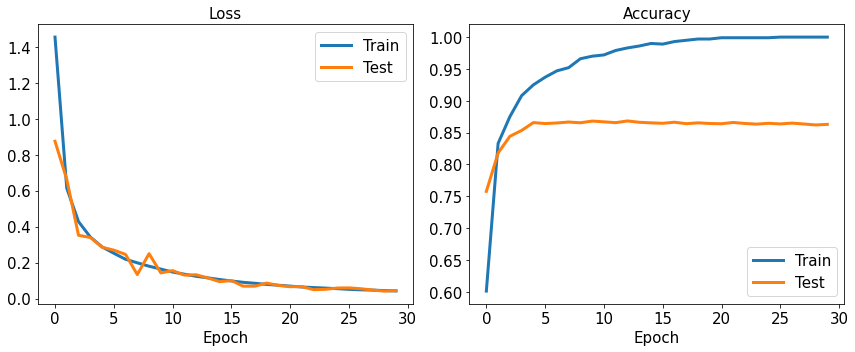

In [247]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3, label='Train')
ax.plot(loss_test_hist, lw=3, label='Test')
ax.set_title('Loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3, label='Train')
ax.plot(accuracy_test_hist, lw=3, label='Test')
ax.set_title('Accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15)
plt.tight_layout()

plt.show()